# Predicting the Price of Used Cars


To be able to predict used cars market value can help both buyers and sellers.

There are lots of individuals who are interested in the used car market at some points in their life because they wanted to sell their car or buy a used car. In this process, it’s a big corner to pay too much or sell less then it’s market value.

# Importing libraries


In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

# Loading the raw data


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/kapilthakre/Predicting-the-Price-of-Used-Cars/095b51628b2d1be09c60a49a4e8b162d84f814b8/Datasets/car_price_data1.csv")


In [3]:
df.head()


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
df = pd.DataFrame(data=df)
df.tail()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013,T5 (Transporter)


Here we are loading the dataset into DataFrame.



# Data Inspection


In [5]:
df.shape


(4345, 9)

There are 4345 rows and 9 columns in the dataset.



In [6]:
df.dtypes


Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

All the columns are of object datatype except the target variable, 'Price (in ₹)' which is of integer data type.



In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


There are 9 columns and varient column have null values and all the columns are of object data type except 'Price (in ₹)' which is of integer data type. The total memory usage of this dataset is 305.6+ KB.

In [8]:
df.columns


Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

There are 9 columns:

1.'Brand & Model' : It gives us the brand of the car alongwith its model name and manufacturing year
2.'Varient' : It gives us the varient of particular car model
3.'Fuel Type' : It gives us the type of fuel used by the car
4.'Driven Kilometers' : It gives us the total distance in kms covered by car
5.'Transmission' : It tells us whether the gear transmission is Manual or Automatic
6.'Owner' : It tells us the total numbers of owners car had previously
7.'Location' : It gives us the locaion of the car
8.'Date of Posting Ad' : It teels us when the advertisement for selling that car was posted online
9.'Price (in ₹)' : It gives us the price of the car.

Here 'Price (in ₹)' is our target variable.

# Data Cleaning


In [9]:
#Checking for Null values
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

There are 172 null values in column 'Varient' and since it is of object type, we will use Mode to fill the rows with null value.



<AxesSubplot:>

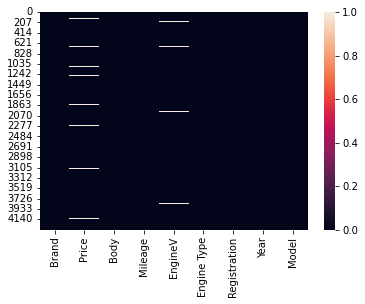

In [11]:
sn.heatmap(df.isnull())


This is the visualization of having just a small number null values in the dataset.



In [13]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['EngineV']=imp.fit_transform(df['EngineV'].values.reshape(-1,1))

Treating the null values with mode using Simple Imputer



In [14]:
#Checking for Null values
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV           0
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Price']=imp.fit_transform(df['Price'].values.reshape(-1,1))

In [16]:
#Checking for Null values
df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

Now there are no null values in the dataset.



In [17]:
#Checking for outliers and Skewness


Since all the variables are of object data type, we will not check for outliers or skewness.



<AxesSubplot:xlabel='Price'>

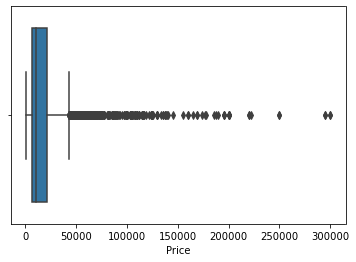

In [19]:
sn.boxplot(df['Price'])


There are many outliers but since it's the target variable, hence we will not treat the outliers.



<AxesSubplot:xlabel='Price', ylabel='Density'>

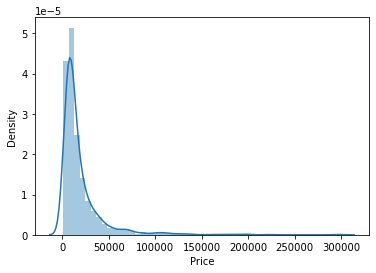

In [20]:
sn.distplot(df['Price'])


The data is very tightly distributed here and is almost normalized.



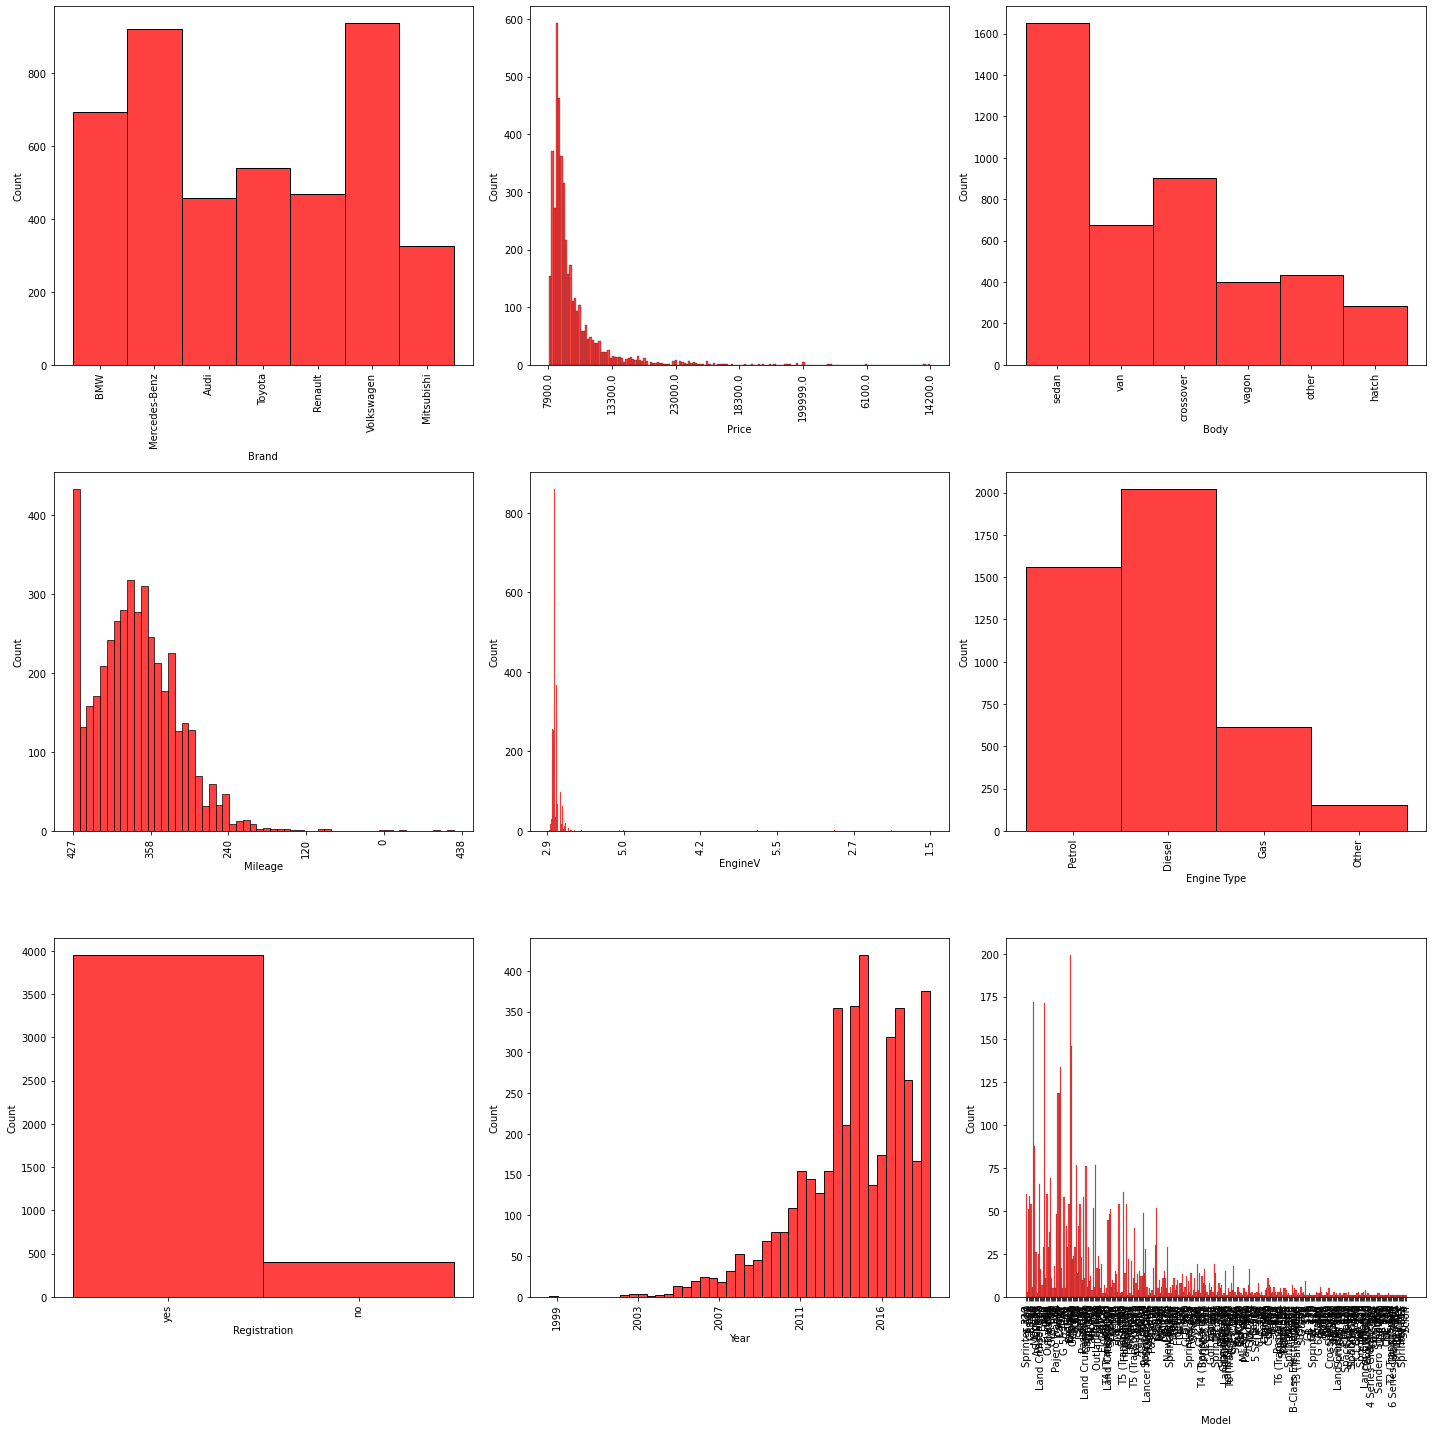

In [21]:
collist=df.columns.values
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(3,3,i+1)
    sn.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)
    plt.tight_layout()

~ Brands, Varients, Driven Kilometers & Location have a wide range of values in them.

~ Maximum Cars run on either Petrol or diesel. Only few goes for CNG and other fuels.

~ Maximum Cars have Manual transnission.

~ Maximum cars are being sold by their very 1st Owner.

~ We have collected the cars posted online in last one month, from 25th December 2021 to 27th January 2022.

~ Almost all the cars have a price rnging in between 6100 to 199999.

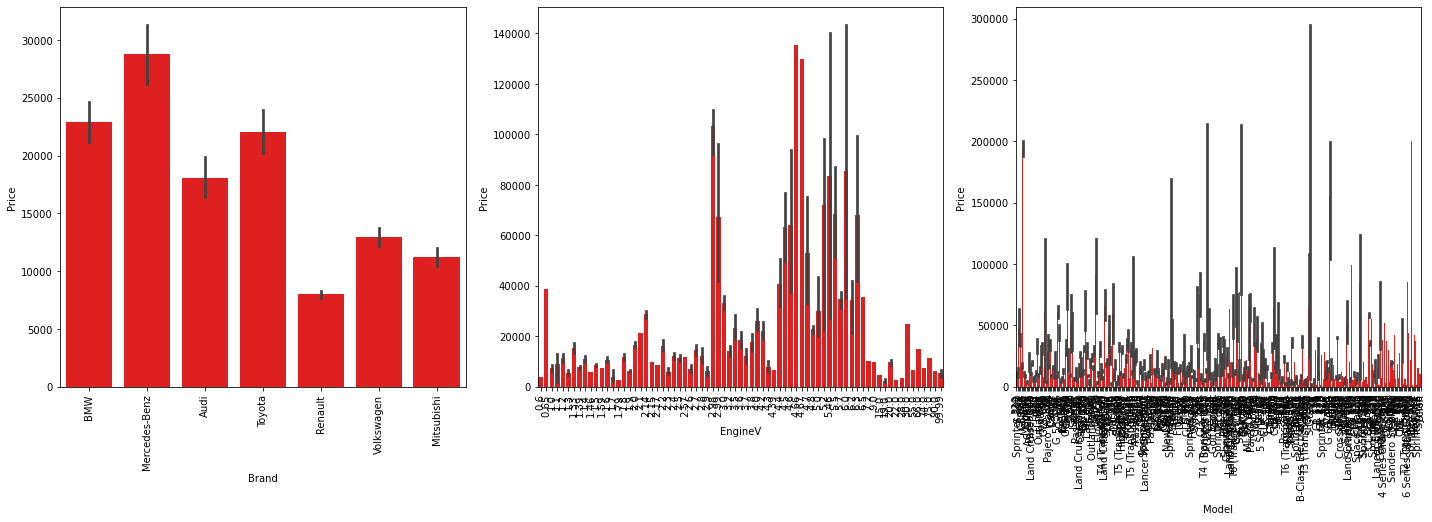

In [23]:
newcollist=['Brand','EngineV','Model']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sn.barplot(data=df,x=i[1],y='Price',color='red')
    plt.xticks(rotation=90)
    plt.tight_layout()

Since Brands, Varients, Driven Kilometers & Location have a wide range of values in them, we will not perform bivariate analysis for them as they will not give us any specific details. Now by plotting graph of brand, EngineV and model against Price, we conclude that Car that uses Diesel, have automatic Transmission and Has only 1 owner is more likely to have a high price.

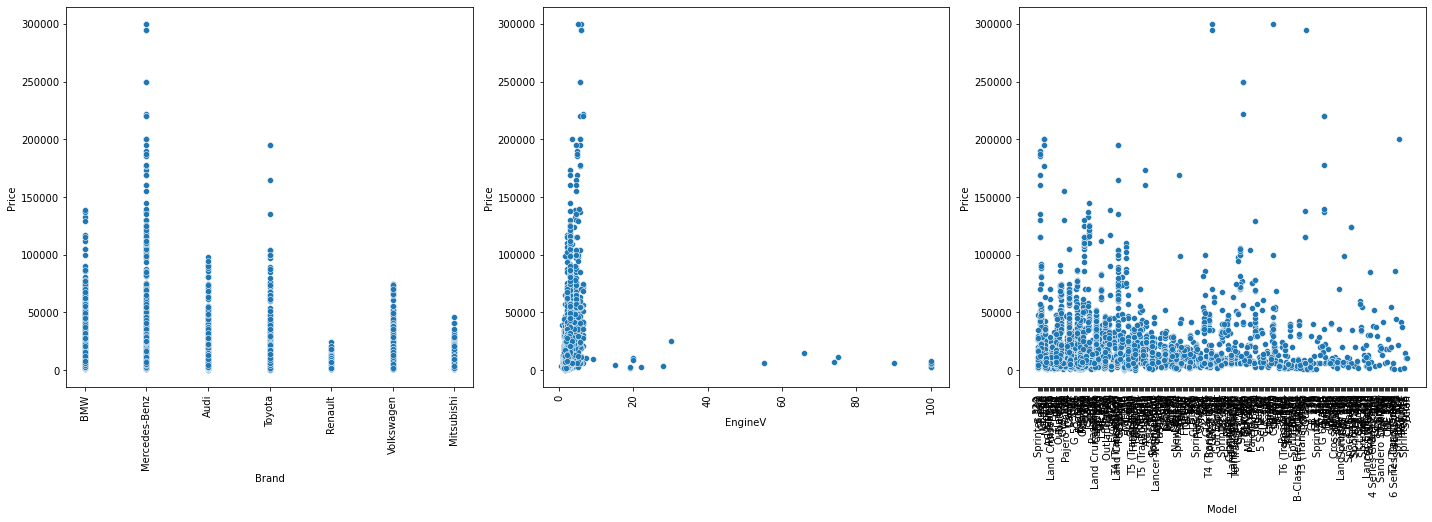

In [24]:
newcollist=['Brand','EngineV','Model']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sn.scatterplot(data=df,x=i[1],y='Price')
    plt.xticks(rotation=90)
    plt.tight_layout()

In [25]:
le = LabelEncoder()
for column in df.drop(['Price'],axis=1).columns:
    df[column]=le.fit_transform(df[column])
df    

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,1,4200.0,3,276,17,3,1,13,18
1,2,7900.0,5,375,30,0,1,21,266
2,2,13300.0,3,339,50,1,1,25,237
3,0,23000.0,0,239,40,3,1,29,224
4,5,18300.0,0,119,17,3,1,33,227
...,...,...,...,...,...,...,...,...,...
4340,2,125000.0,3,9,33,0,1,36,233
4341,1,6500.0,3,1,35,3,1,21,37
4342,1,8000.0,3,193,17,3,1,7,31
4343,5,14200.0,3,30,17,3,1,36,114


# Multivariate Analysis


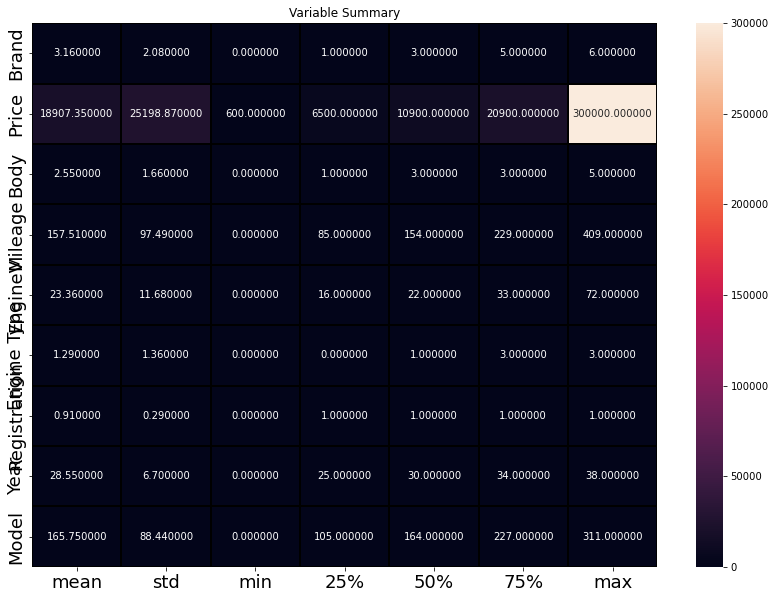

In [26]:
plt.figure(figsize=(14,10))
sn.heatmap(round(df.describe()[1:].transpose(),2),lw=2,linecolor='black',annot=True,fmt='f',color='red')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Variable Summary')
plt.show()

It gives us the statistical summary(which includes mean, median, standard deviation, minimum value, maximum value and quartile values) of all the numerical columns.



<AxesSubplot:>

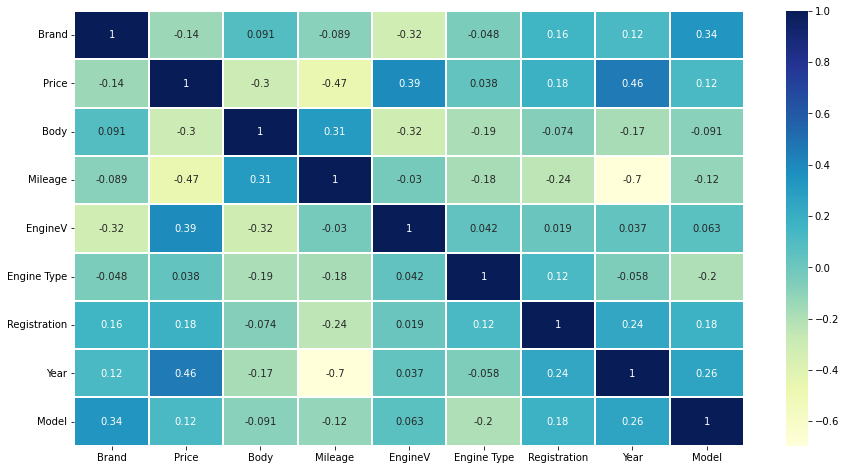

In [27]:
plt.figure(figsize=(15,8))
sn.heatmap(df.corr(), linewidth=0.1, cmap="YlGnBu", annot = True)

# Model Building


In [28]:
x= df.drop(['Price'],axis=1)
y=df['Price']

Separating feature and target variables into x and y.



In [29]:
x=power_transform(x,method='yeo-johnson')
scale = StandardScaler()
x=scale.fit_transform(x)

Power transforming and scaling the feaature variables.



In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 45)
svr = SVR()
svr.fit(xtrain,ytrain)
pred_train_svr=svr.predict(xtrain)
pred_test_svr=svr.predict(xtest)
print('SVR Regressor Score:',svr.score(xtrain,ytrain))
print('SVR Regressor r2_score:',r2_score(ytest,pred_test_svr))
print("Mean squared error of SVR Regressor:",mean_squared_error(ytest,pred_test_svr))
print("Root Mean Square error of SVR Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_svr)))

SVR Regressor Score: -0.0896364915786545
SVR Regressor r2_score: -0.0948225514140637
Mean squared error of SVR Regressor: 682834464.1460276
Root Mean Square error of SVR Regressor: 26131.101472116086


The Accuracy of SVR is in negative which stats that this is not the correct model to apply here.



In [31]:
lr= LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_
pred_train=lr.predict(xtrain)
pred_test=lr.predict(xtest)
print('Linear Regression Score:',lr.score(xtrain,ytrain))
print('Linear Regression r2_score:',r2_score(ytest,pred_test))
print("Mean squared error of Linear Regression:",mean_squared_error(ytest,pred_test))
print("Root Mean Square error of Linear Regression:",np.sqrt(mean_squared_error(ytest,pred_test)))

Linear Regression Score: 0.4236693772203213
Linear Regression r2_score: 0.4580396543781936
Mean squared error of Linear Regression: 338017518.6500166
Root Mean Square error of Linear Regression: 18385.25274914698


In [33]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
pred_train_sgd=sgd.predict(xtrain)
pred_test_sgd=sgd.predict(xtest)
print('SGD Regressor Score:',sgd.score(xtrain,ytrain))
print('SGD Regressor r2_score:',r2_score(ytest,pred_test_sgd))
print("Mean squared error of SGD Regressor:",mean_squared_error(ytest,pred_test_sgd))
print("Root Mean Square error of SGD Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_sgd)))

SGD Regressor Score: 0.4221449157178091
SGD Regressor r2_score: 0.45668278808870966
Mean squared error of SGD Regressor: 338863788.2710624
Root Mean Square error of SGD Regressor: 18408.253265072774


In [34]:
knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
pred_train_knr=knr.predict(xtrain)
pred_test_knr=knr.predict(xtest)
print('K Neighbors Regressor Score:',knr.score(xtrain,ytrain))
print('K Neighbors Regressor r2_score:',r2_score(ytest,pred_test_knr))
print("Mean squared error of K Neighbors Regressor:",mean_squared_error(ytest,pred_test_knr))
print("Root Mean Square error of K Neighbors Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_knr)))

K Neighbors Regressor Score: 0.6585586276945821
K Neighbors Regressor r2_score: 0.5921733696554281
Mean squared error of K Neighbors Regressor: 254359099.77935308
Root Mean Square error of K Neighbors Regressor: 15948.639433486265


In [35]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
pred_train_dtr=dtr.predict(xtrain)
pred_test_dtr=dtr.predict(xtest)
print('Decision Tree Regressor Score:',dtr.score(xtrain,ytrain))
print('Decision Tree Regressor r2_score:',r2_score(ytest,pred_test_dtr))
print("Mean squared error of Decision Tree Regressor:",mean_squared_error(ytest,pred_test_dtr))
print("Root Mean Square error of Decision Tree Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_dtr)))

Decision Tree Regressor Score: 0.9304212848956466
Decision Tree Regressor r2_score: 0.3596139887805133
Mean squared error of Decision Tree Regressor: 399405034.4075266
Root Mean Square error of Decision Tree Regressor: 19985.120325070016


In [36]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)
print('Random Forest Regressor Score:',rf.score(xtrain,ytrain))
print('Random Forest Regressor r2_score:',r2_score(ytest,pred_test_rf))
print("Mean squared error of Random Forest Regressor:",mean_squared_error(ytest,pred_test_rf))
print("Root Mean Square error of Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_rf)))

Random Forest Regressor Score: 0.8839257246348471
Random Forest Regressor r2_score: 0.5596318285927923
Mean squared error of Random Forest Regressor: 274655069.86627823
Root Mean Square error of Random Forest Regressor: 16572.72065372123


# Cross Validation Score


In [38]:
print('Cross Validation Score of SVR is',(cvs(svr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Linear Regression is',(cvs(lr,x,y,cv=5).mean())*100)
print('Cross Validation Score of SGD Regressor is',(cvs(sgd,x,y,cv=5).mean())*100)
print('Cross Validation Score of KNeighbors Regressor is',(cvs(knr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Decision Tree Regressor is',(cvs(dtr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Random Forest Regressor is',(cvs(rf,x,y,cv=5).mean())*100)

Cross Validation Score of SVR is -9.347345638552982
Cross Validation Score of Linear Regression is 43.189145048825225
Cross Validation Score of SGD Regressor is 43.1987079460873
Cross Validation Score of KNeighbors Regressor is 56.90126386494037
Cross Validation Score of Decision Tree Regressor is 39.22210602682076
Cross Validation Score of Random Forest Regressor is 57.79793215217553


# Hyper Parameter Tuning


In [40]:
pricecar = RandomForestRegressor(bootstrap=False,min_samples_leaf=1,max_features='sqrt',min_samples_split=2)
pricecar.fit(xtrain,ytrain)
pred=pricecar.predict(xtest)
acc=r2_score(ytest,pred)
print('Score of Hyper Parameter Tuned Ranfom Forest Regressor is:',pricecar.score(xtrain,ytrain))
print('Accuracy for predicting price of car is', (acc*100),'%')
print("Mean squared error of Hyper Parameter Tuned Random Forest Regressor:",mean_squared_error(ytest,pred))
print("Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred)))

Score of Hyper Parameter Tuned Ranfom Forest Regressor is: 0.930421273854382
Accuracy for predicting price of car is 57.25096701146357 %
Mean squared error of Hyper Parameter Tuned Random Forest Regressor: 266623234.9323267
Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor: 16328.60174455629


# Conclusion


In [41]:
a= np.array(ytest)
predicted = np.array(pricecar.predict(xtest))
Price=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
Price

,Original,Predicted
0,20500.0,18334.0000
1,27500.0,22341.0000
2,21700.0,26744.5200
3,7400.0,7074.4900
4,44000.0,34424.2765
...,...,...
1299,13999.0,14553.4800
1300,17500.0,18249.5200
1301,25300.0,21849.8360
1302,30900.0,25679.4600
